In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [3]:
df = pd.read_csv("SMSdata.csv")

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.shape

(5572, 2)

In [6]:
df
df.duplicated().sum()

415

In [7]:
df= df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [10]:
df.shape

(5157, 2)

In [10]:
df['Label'] = df['Label'].replace('ham', 0, regex=True)
df['Label'] = df['Label'].replace('spam', 1, regex=True)

In [369]:
df

,Label,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Count of Ham Spam


In [11]:
df['Label'].value_counts()

Label
0    4516
1     641
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

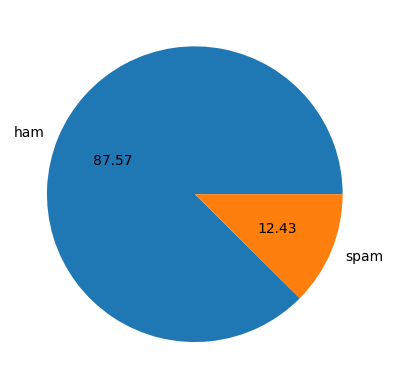

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels= [ 'ham','spam'] , autopct="%0.2f")
plt.show

In [13]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# number of characters in the SMS

df['num_characters'] = df ['Msg'].apply(len)
df.head()

,Label,Msg,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# number of words in the SMS

df['num_words'] = df['Msg'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
df.head()

,Label,Msg,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
# number of sentences in the SMS

df['num_sentences'] = df['Msg'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Label,Msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Text Preprocessing


In [ ]:
# converts to lowercase
# converts to tokens - tokenizer
#removes special characters
#remove stop words and punctuation

In [23]:
def transform_Msg(Msg):
    Msg=Msg.lower()
    Msg = nltk.word_tokenize(Msg)

    y = []
    for i in Msg:
        if i.isalnum():
            y.append(i)

    Msg = y[:] 
    y.clear()

    for i in Msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " ".join(y)


In [24]:
transform_Msg("Is that seriously how you spell his name? ")

'seriously spell name'

In [25]:
from nltk.corpus  import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [198]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
df['transformed_Msg'] = df['Msg'] .apply(transform_Msg)

In [19]:
df.head()

,Label,Msg,num_sentences,transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,nah think goes usf lives around though


In [27]:
wc = WordCloud(width= 5000,height =5000,min_font_size=10 , background_color='white')

In [29]:
spam_wc = wc.generate (df[df['Label']==1]['transformed_Msg'].str.cat(sep=""))

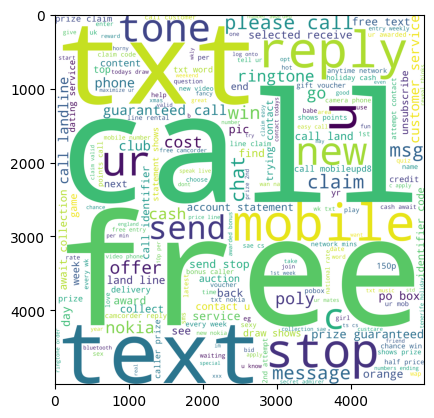

In [30]:
plt.imshow(spam_wc)

In [31]:
ham_wc = wc.generate (df[df['Label']==0]['transformed_Msg'].str.cat(sep=""))

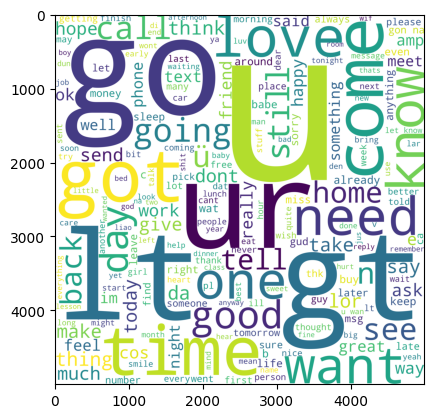

In [32]:
plt.imshow(ham_wc)

# Model Build

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [34]:
X = cv.fit_transform(df['transformed_Msg']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
y = df['Label'] .values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
X_train , X_test , y_train , y_test = train_test_split ( X ,y , test_size= 0.2 , random_state=3 )

In [37]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157, 8078)
(4125, 8078)
(1032, 8078)


In [38]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5157,)
(4125,)
(1032,)


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
prediction_traindata= model.predict(X_train)
accuracy_traindata = accuracy_score ( y_train , prediction_traindata)

In [339]:
print(accuracy_traindata)

0.9958787878787879


In [340]:
prediction_testdata = model.predict(X_test)
accuracy_testdata = accuracy_score (y_test , prediction_testdata)
print ( accuracy_testdata)

0.9738372093023255


In [341]:
from sklearn.metrics import precision_score
precision_traindata = precision_score ( y_train , prediction_traindata)
print ( precision_traindata)

0.997946611909651


In [342]:
from sklearn.metrics import precision_score
precision_testdata = precision_score ( y_test , prediction_testdata)
print ( precision_testdata)

1.0


In [343]:
from sklearn.metrics import recall_score
recall_traindata = recall_score( y_train , prediction_traindata)
print ( recall_traindata)

0.9681274900398407


In [344]:
recall_testdata = recall_score ( y_test , prediction_testdata)
print ( recall_testdata)

0.8057553956834532


In [345]:
from sklearn.metrics import f1_score
f1_score_traindata = f1_score( y_train , prediction_traindata)
print ( f1_score_traindata)

0.9828109201213346


In [346]:
f1_score_testdata = f1_score( y_test , prediction_testdata)
print ( f1_score_testdata)

0.8924302788844621


In [361]:
user_data = df['Msg'][10]
print(user_data)
user_data = transform_Msg(user_data)
user_data

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


'gon na home soon want talk stuff anymore tonight k cried enough today'

In [49]:
from sklearn.metrics import classification_report
print ( classification_report(y_train, prediction_traindata))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3623
           1       1.00      0.97      0.98       502

    accuracy                           1.00      4125
   macro avg       1.00      0.98      0.99      4125
weighted avg       1.00      1.00      1.00      4125



In [41]:
user_data = str(input("Please enter the SMS: "))
print(user_data)
prediction(user_data).transform_Msg()

Please enter the SMS:  dfgdshdh


dfgdshdh


NameError: name 'prediction' is not defined